In [1]:
# pandasライブラリをインポートします。
import pandas as pd
 
# CSV形式のファイルをpandasのデータフレーム形式に読み込みます。
# skiprows : 先頭から1、2、3、5、6行目のデータは読み込みません。
# encoding : 文字コードはShift JISを指定します。
# index_col : 日付をインデックスにします。
df = pd.read_csv( "aisai.csv", skiprows=[0,1,2,4,5], encoding='shift_jis', index_col=0 )
 
# どのように読み込まれたかを先頭5行を表示して確認します。
df.head()

,最低気温(℃),最低気温(℃).1,最低気温(℃).2
年月日,,,
2009/1/1,-0.7,8,1
2009/1/2,-1.2,8,1
2009/1/3,2.2,8,1
2009/1/4,-0.3,8,1
2009/1/5,-0.3,8,1


In [2]:
df = df.drop( df.columns[[1,2]], axis=1 )
df.head()

,最低気温(℃)
年月日,
2009/1/1,-0.7
2009/1/2,-1.2
2009/1/3,2.2
2009/1/4,-0.3
2009/1/5,-0.3


In [3]:
df.index = pd.to_datetime( df.index )
df.head()

,最低気温(℃)
年月日,
2009-01-01,-0.7
2009-01-02,-1.2
2009-01-03,2.2
2009-01-04,-0.3
2009-01-05,-0.3


C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\matplotlib\bac

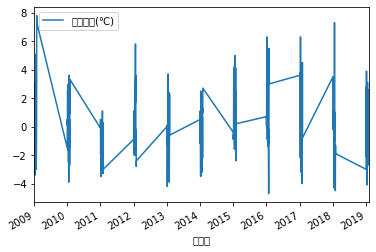

In [4]:
%matplotlib inline
df.plot()

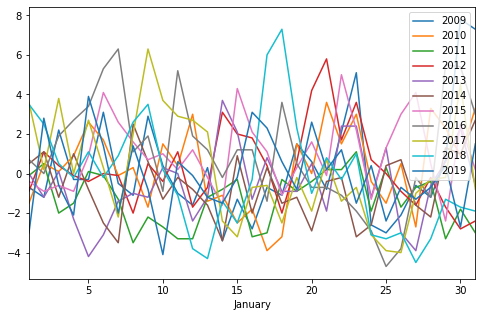

In [6]:
# axパラメーターを初期化します。
ax = None
 
# インデックスのタイトルを「年月日」から「January」に修正します。
df.index.name = "January"
 
# 2009年から2019年まで各年ごとにplotメソッドを呼び出します。
for year in range( 2009, 2019 + 1 ):
    # 気温データを年ごとに抽出します。
    df_year = df[df.index.year==year]
    # 横軸が日にちのみとなるようDataFrameを変更します。
    df_year.index = df_year.index.day
    # 列名を「最低気温(℃)」から各年の西暦に変更し、グラフの凡例に表示させます。
    df_year.columns = [year]
    # axパラメーターplotメソッドを呼び出します。
    ax = df_year.plot( ax=ax, figsize=(8, 5), fontsize=10 )

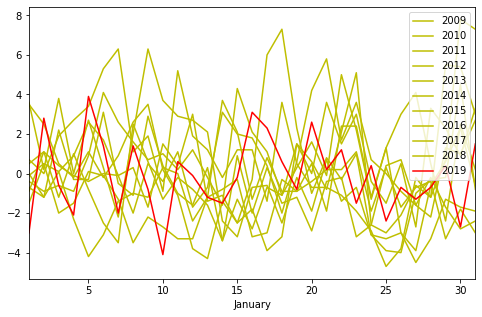

In [7]:
# axパラメーターを初期化します。
ax = None
 
# 2009年から2019年まで各年ごとにplotメソッドを呼び出します。
for year in range( 2009, 2019 + 1 ):
    # 気温データを年ごとに抽出します。
    df_year = df[df.index.year == year]
    # 横軸が日にちのみとなるようDataFrameを変更します。
    df_year.index = df_year.index.day
    # 列名を「最低気温(℃)」から年に変更し、グラフの凡例に表示させます。
    df_year.columns = [year]
    # axパラメーターplotメソッドを呼び出します。
    if year == 2019:
        # 2019年のデータを赤（red）で表示します。
        ax = df_year.plot( ax=ax, figsize=(8, 5), fontsize=10, c='r')
    else:
        # 2019年のデータを黄色（yellow）で表示します。
        ax = df_year.plot( ax=ax, figsize=(8, 5), fontsize=10, c='y')

In [8]:
# プログラム上で正しく列名を認識させるため、列名を「最低気温(℃)」から「temperature」に変更します。
df.columns = ["temperature"]
 
# 各年の気温データが複数列になるDataFrameを作成します。
for year in range( 2009, 2019 + 1):
    if year == 2009:
        # 2009年のデータでDataFrameを新規に作成します。
        df_multi = pd.DataFrame({2009:df[df.index.year==year].temperature} )
        # 「年月日」を2010年から2018年のデータが追加できるように日にちのみに変更します。
        df_multi.index = df_multi.index.day
    else:
        # 一度、仮のDataFrameに読み込み、「年月日」列を削除します。
        df_tmp = pd.DataFrame({'temperature':df[df.index.year==year].temperature} )
        df_tmp.index = df_tmp.index.day
        # 2009年のDataFrameに2010年から2018年の気温データを追加します。
        df_multi[year] = df_tmp.temperature
df_multi.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
January,,,,,,,,,,,
1,-0.7,-1.5,-0.1,-0.9,0.0,0.5,-0.4,0.7,3.6,3.5,-3.0
2,-1.2,0.5,0.5,1.1,-1.2,1.1,-0.9,0.0,0.2,2.5,2.8
3,2.2,0.1,-2.0,0.4,0.1,-1.2,-0.6,1.9,3.8,0.5,-0.6
4,-0.3,0.9,-1.5,-0.1,-2.3,1.0,-0.9,2.7,0.0,-0.2,-2.1
5,-0.3,2.6,0.1,-0.4,-4.2,-0.8,0.9,3.4,2.7,1.1,3.9


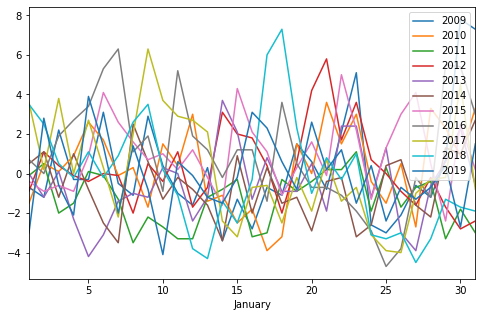

In [9]:
# plotメソッドを呼び出します。
df_multi.plot( figsize=(8, 5), fontsize=10 )

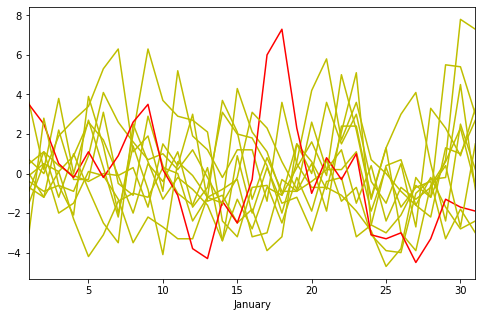

In [10]:
# axパラメーターを初期化します。
ax = None
for year in range( 2009, 2019 + 1 ):
    if year == 2018:
        ax = df_multi[year].plot( figsize=(8, 5), fontsize=10, c='r')
    else:
        ax = df_multi[year].plot( figsize=(8, 5), fontsize=10, c='y')

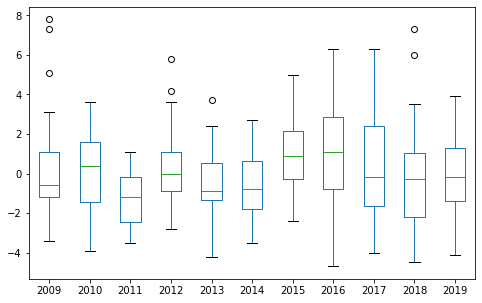

In [11]:
df_multi.plot( kind='box', figsize=(8, 5), fontsize=10 )

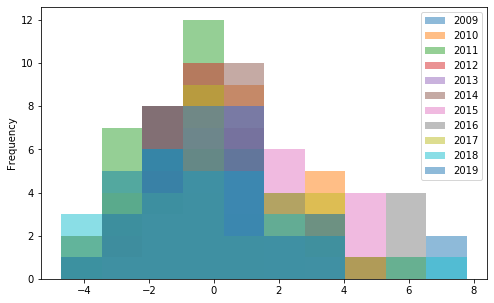

In [12]:
# alphaはグラフの透過率です。
df_multi.plot( kind='hist', figsize=(8, 5), fontsize=10, alpha=0.5 )

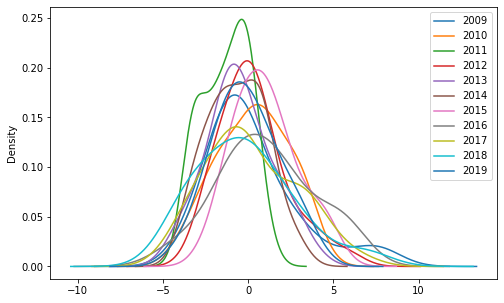

In [13]:
df_multi.plot( kind='kde', figsize=(8, 5), fontsize=10 )

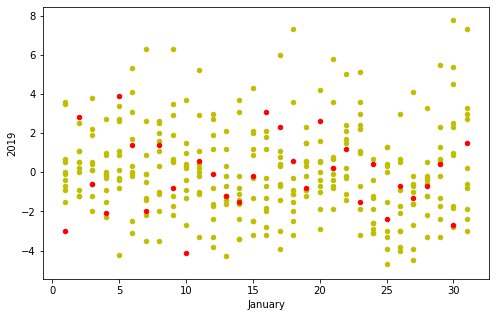

In [14]:
# 散布図の場合はインデックスを軸にできないため、インデックスを「January」列として追加します。
df_multi['January'] = df_multi.index
# axパラメーターを初期化します。
ax = None
for year in range( 2009, 2019 + 1 ):
    if year == 2019:
        ax = df_multi.plot( kind='scatter', ax=ax, x="January", y=year, figsize=(8, 5), fontsize=10, c='r')
    else:
        ax = df_multi.plot( kind='scatter', ax=ax, x="January", y=year, figsize=(8, 5), fontsize=10, c='y')
# 散布図のプロットが完了したので、最初に追加した「January」列は削除します
del df_multi['January']

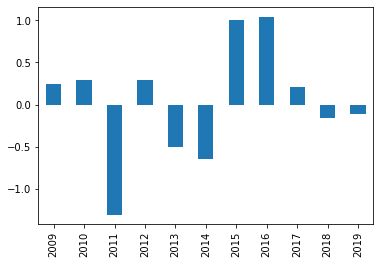

In [15]:
# 各年の最低気温の平均をグラフにします。
df_multi.mean().plot( kind='bar')

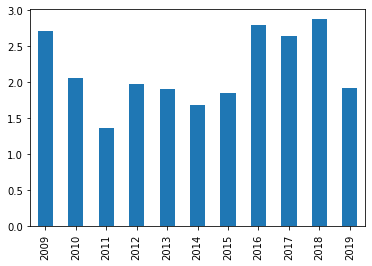

In [16]:
# 各年の最低気温の標準偏差をグラフにします。
df_multi.std().plot( kind='bar' )